In [1]:
print("TOWFEKA BENTA TOWHID")
print("ID: 11200120427")

TOWFEKA BENTA TOWHID
ID: 11200120427


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report



In [3]:
df= pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
df['Sex'].replace(['M','F'],[0,1],inplace=True)
df['ChestPainType'].replace(['TA','ATA','NAP','ASY'],[0,1,2,3],inplace=True)
df['RestingECG'].replace(['Normal','ST','LVH'],[0,1,2],inplace=True)
df['ExerciseAngina'].replace(['N','Y'],[0,1],inplace=True)
df['ST_Slope'].replace(['Up','Flat','Down'],[0,1,2],inplace=True)

In [7]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0,1.2,1,1
914,68,0,3,144,193,1,0,141,0,3.4,1,1
915,57,0,3,130,131,0,0,115,1,1.2,1,1
916,57,1,1,130,236,0,2,174,0,0.0,1,1


In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y =  df[['HeartDisease']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((459, 11), (459, 11), (459, 1), (459, 1))

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression()

In [14]:
model.fit(X_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred = model.predict(X_test)
y_pred = model.predict(X_test)



In [16]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

In [17]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.85
Precision: 0.87
Recall: 0.86
F1-score: 0.86
ROC AUC: 0.91


In [18]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       201
           1       0.87      0.86      0.86       258

    accuracy                           0.85       459
   macro avg       0.84      0.85      0.85       459
weighted avg       0.85      0.85      0.85       459



In [19]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[167  34]
 [ 36 222]]


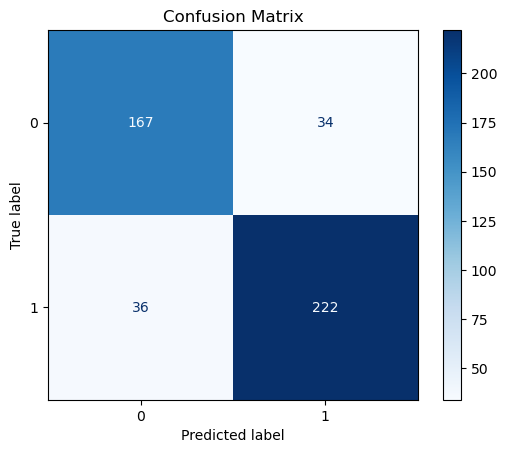

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

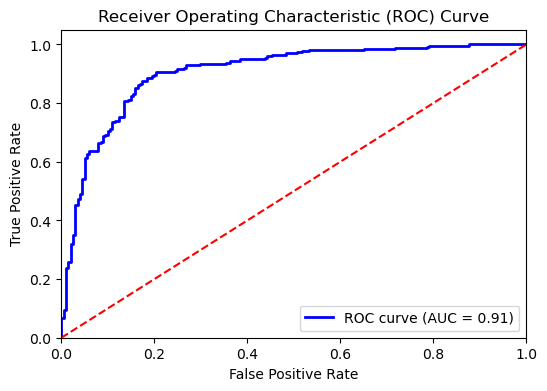

In [21]:

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()